In [134]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus'] = False

In [135]:
import pandas as pd

In [136]:
df = pd.read_csv('data/score.csv', index_col='지원번호')

In [137]:
labels = list(df['이름'])
heights =list(df['키'])

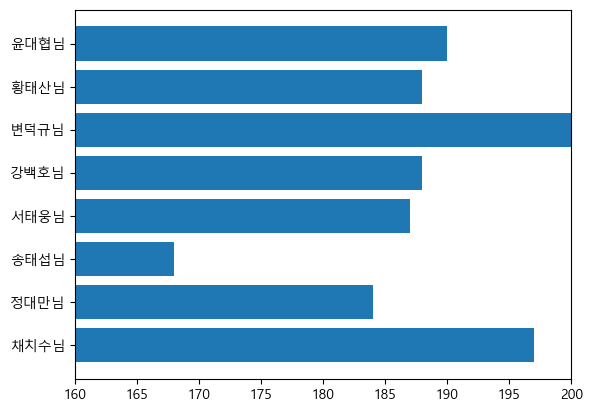

In [138]:
names = [x + '님' for x in labels]
plt.barh(names, heights)
plt.xlim(160, 200)
plt.show()

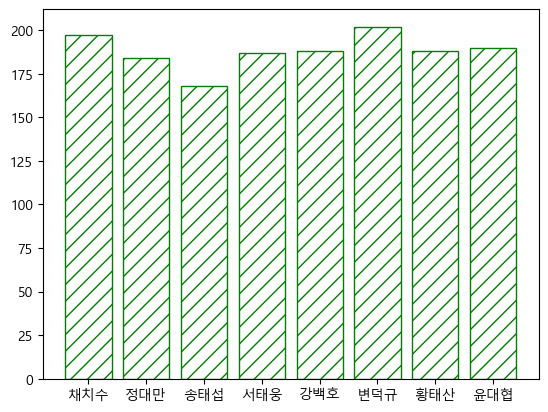

In [139]:
bar=plt.bar(labels, heights, color='none', ec='g')
for i, label in enumerate(labels):
    bar[i].set_hatch('//') #/, x , .., o, O, oo, //..
plt.show()

In [140]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

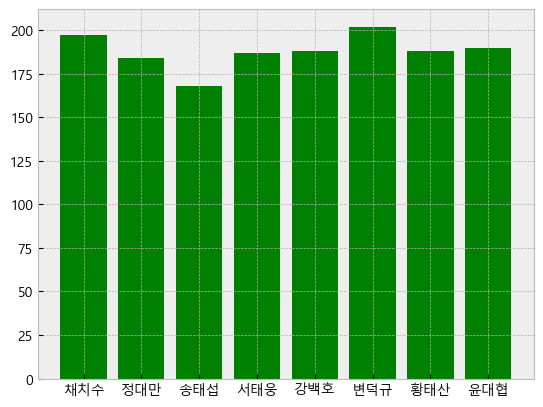

In [141]:
with plt.style.context('bmh'):
    plt.bar(labels, heights, color='g')
    plt.show()

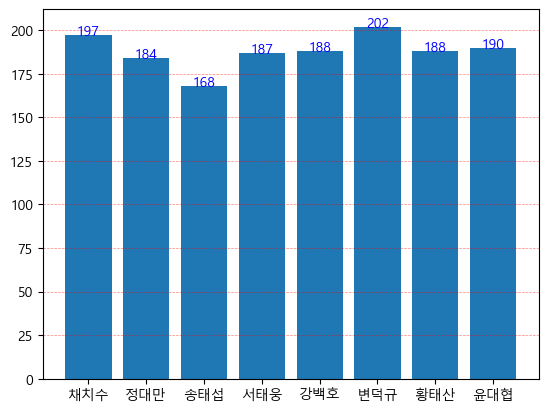

In [166]:
bars = plt.bar(labels, heights)
for idx, bar in enumerate(bars):
    plt.text(idx, bar.get_height(), heights[idx], ha='center', color='blue')
plt.grid(axis='y', color='red', alpha=0.5, ls='--', lw=0.5)
plt.show()

In [143]:
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,채치수,북산고,197,90,85,100,95,85,Python
2번,정대만,북산고,184,40,35,50,55,25,Java
3번,송태섭,북산고,168,80,75,70,80,75,Javascript
4번,서태웅,북산고,187,40,60,70,75,80,NaN
5번,강백호,북산고,188,15,20,10,35,10,NaN
6번,변덕규,능남고,202,80,100,95,85,80,C
7번,황태산,능남고,188,55,65,45,40,35,PYTHON
8번,윤대협,능남고,190,100,85,90,95,95,C#


In [144]:
df.loc['2번', '학교'] = '산북고'
df.loc['8번', '학교'] = '남능고'

In [145]:
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,채치수,북산고,197,90,85,100,95,85,Python
2번,정대만,산북고,184,40,35,50,55,25,Java
3번,송태섭,북산고,168,80,75,70,80,75,Javascript
4번,서태웅,북산고,187,40,60,70,75,80,NaN
5번,강백호,북산고,188,15,20,10,35,10,NaN
6번,변덕규,능남고,202,80,100,95,85,80,C
7번,황태산,능남고,188,55,65,45,40,35,PYTHON
8번,윤대협,남능고,190,100,85,90,95,95,C#


In [201]:
height = df.groupby('학교')['키'].mean()
height

학교
남능고    190.0
능남고    195.0
북산고    185.0
산북고    184.0
Name: 키, dtype: float64

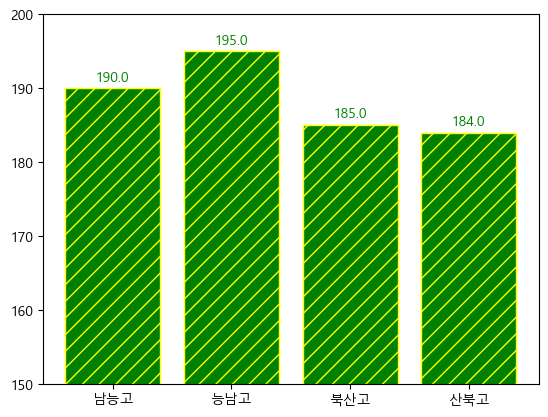

In [202]:
bars = plt.bar(height.index, height.values, color='green', ec='yellow')
plt.ylim(150, 200)
for idx, bar in enumerate(bars):
    plt.text(idx, bar.get_height()+1, height.values[idx], ha='center', color='green')
    bars[idx].set_hatch('//')

plt.savefig('data/mean.png', dpi=100)    
plt.show()

In [148]:
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,채치수,북산고,197,90,85,100,95,85,Python
2번,정대만,산북고,184,40,35,50,55,25,Java
3번,송태섭,북산고,168,80,75,70,80,75,Javascript
4번,서태웅,북산고,187,40,60,70,75,80,NaN
5번,강백호,북산고,188,15,20,10,35,10,NaN
6번,변덕규,능남고,202,80,100,95,85,80,C
7번,황태산,능남고,188,55,65,45,40,35,PYTHON
8번,윤대협,남능고,190,100,85,90,95,95,C#


In [149]:
df['SW특기'] = df['SW특기'].apply(lambda x : x.capitalize() if pd.notnull(x) else '없음')

In [150]:
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,채치수,북산고,197,90,85,100,95,85,Python
2번,정대만,산북고,184,40,35,50,55,25,Java
3번,송태섭,북산고,168,80,75,70,80,75,Javascript
4번,서태웅,북산고,187,40,60,70,75,80,없음
5번,강백호,북산고,188,15,20,10,35,10,없음
6번,변덕규,능남고,202,80,100,95,85,80,C
7번,황태산,능남고,188,55,65,45,40,35,Python
8번,윤대협,남능고,190,100,85,90,95,95,C#


In [151]:
sw = df.groupby('SW특기').size()
sw

SW특기
C             1
C#            1
Java          1
Javascript    1
Python        2
없음            2
dtype: int64

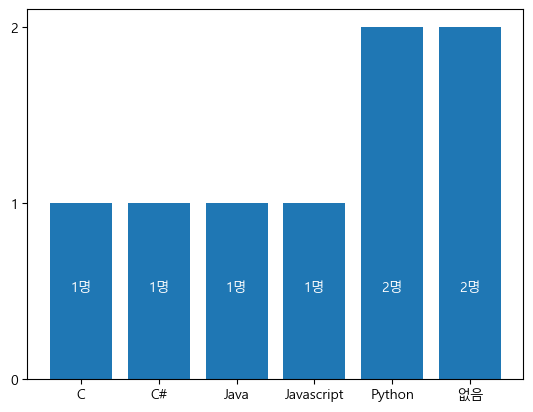

In [152]:
yticks = [y for y in range(0, max(sw.values)+1, 1)]
bars=plt.bar(sw.index, sw.values)
plt.yticks(yticks)
for idx, bar in enumerate(bars):
    plt.text(idx, 0.5, str(sw.values[idx]) + '명', color='w', ha='center')
plt.show()